#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 📧 Email Spam or Not (Classification)📭
</p>

In [1]:
import pandas as pd 
import numpy as np

#  <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> Readers data</p>

In [2]:
df=pd.read_csv("/kaggle/input/email-spam-or-not-classification/spam_dataset.csv")

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">describe in data</p>[](http://)

In [3]:
df.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [4]:
df=df.drop_duplicates()

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">is null</p>[](http://)

In [5]:
df.isnull().sum()

message_content    0
is_spam            0
dtype: int64

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">train_test_split</p>[](http://)

In [6]:
x=df['message_content']
y=df['is_spam']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">TfidfVectorizert</p>[](http://)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [10]:
tfid=TfidfVectorizer(stop_words="english")

In [11]:
x_train2=tfid.fit_transform(x_train)

In [12]:
x_test2=tfid.transform(x_test)

In [13]:
print(tfid.get_feature_names_out())

['01' '02' '03' ... 'zachary' 'zavala' 'zimmerman']


# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">imbalanced data</p> 

In [14]:
y_train.value_counts()

is_spam
0    354
1    119
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
over=SMOTE()

In [17]:
x_train2, y_train = over.fit_resample(x_train2.toarray(), y_train)

In [18]:
y_train.value_counts()

is_spam
1    354
0    354
Name: count, dtype: int64

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">build model</p> 

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
model= MultinomialNB()

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">cross_val_scorel</p> 

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
c_v = cross_val_score(estimator=model, X=x_train2, y=y_train, cv=5, scoring='f1')

In [23]:
g=pd.DataFrame(c_v)

In [24]:
g.mean()

0    1.0
dtype: float64

In [25]:
model.fit(x_train2,y_train)

MultinomialNB()

In [26]:
pred_y=model.predict(x_test2)

# <p style="width: 800px; border-radius: 12px; border: 3px dashed #ffe81c; padding: 20px; background-color: #058BDD; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #F0FF00; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">Evaluation</p>  


In [27]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score

In [28]:
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(precision_score(y_test,pred_y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        58

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204

[[146   0]
 [  0  58]]
1.0


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

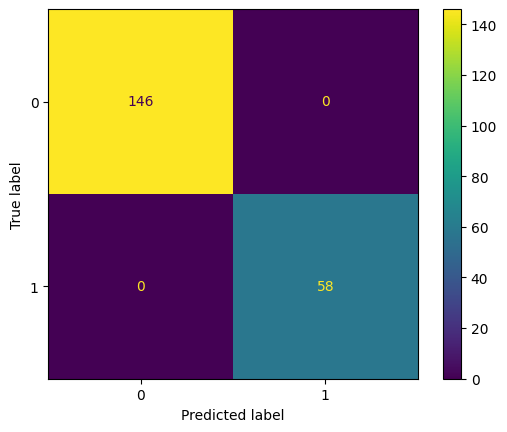

In [30]:
ConfusionMatrixDisplay.from_estimator(model, x_test2, y_test)
